In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn import metrics
from sklearn import tree
import warnings
from google.colab import files
warnings.filterwarnings('ignore')

In [2]:
!ls

sample_data


In [3]:
uploaded=files.upload()

Saving crop_recommendation.csv to crop_recommendation.csv


In [4]:
df = pd.read_csv('crop_recommendation.csv')

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
df.size

17600

In [8]:
df.shape

(2200, 8)

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

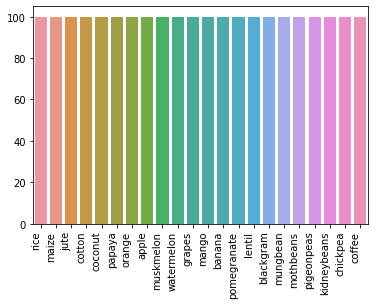

In [13]:
label=df['label'].value_counts()
sns.barplot(x=label.index,y=label.values)
plt.xticks(rotation=90,horizontalalignment='right')

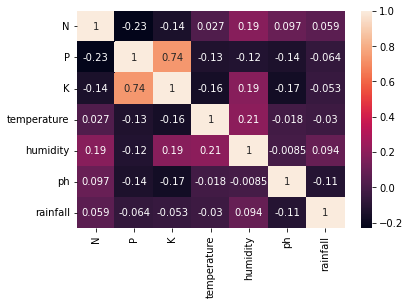

In [14]:
plt.rcParams.update({'font.size': 10})
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [15]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [16]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
precision = []
recall = []
f1score = []
model = []

In [17]:
# Splitting into train and test data into 80:20 split

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

report11 = classification_report(Ytest,predicted_values)

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

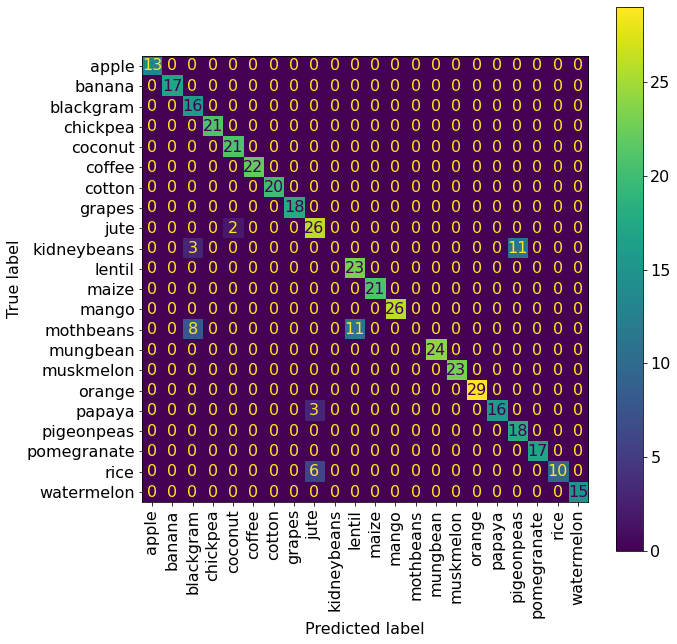

In [19]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['apple','banana','blackgram','chickpea','coconut','coffee','cotton','grapes','jute','kidneybeans','lentil','maize','mango','mothbeans','mungbean','muskmelon','orange','papaya','pigeonpeas','pomegranate','rice','watermelon']

cm = confusion_matrix(Ytest, predicted_values) 
cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))

cmp.plot(ax=ax, xticks_rotation='vertical')

In [20]:
print("Metric Evaluation for Decision Tree ")

precision.append(round(precision_score(Ytest, predicted_values, average="macro"),4))
recall.append(round(recall_score(Ytest, predicted_values, average="macro"),4))
f1score.append(round(f1_score(Ytest, predicted_values, average="macro"),4))

print("Avg Precision: "+ str(round(precision_score(Ytest, predicted_values, average="macro"),4))) 
print("Avg Recall: " + str(round(recall_score(Ytest, predicted_values, average="macro"),4)))
print("Avg F1 score: " + str(round(f1_score(Ytest, predicted_values, average="macro"),4)))

Metric Evaluation for Decision Tree 
Avg Precision: 0.843
Avg Recall: 0.8816
Avg F1 score: 0.8537


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [23]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

# Guassian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

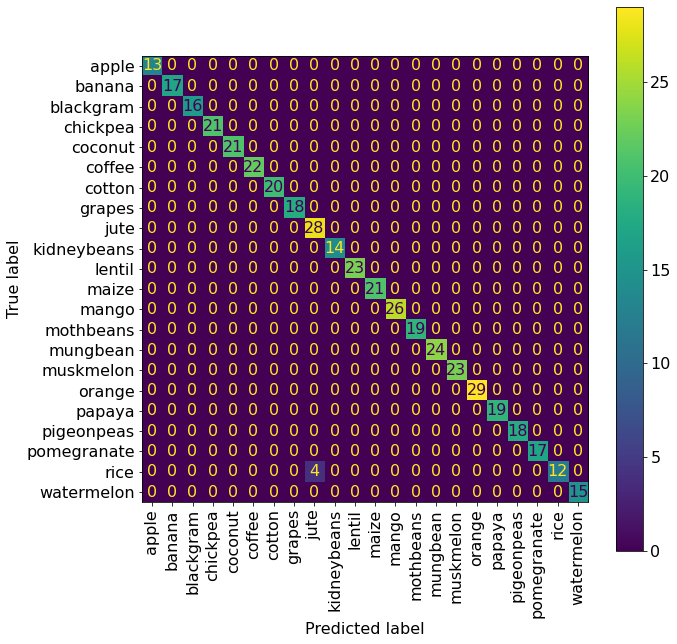

In [25]:
cm = confusion_matrix(Ytest, predicted_values) 
cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
cmp.plot(ax=ax, xticks_rotation='vertical')

In [26]:
print("Metric Evaluation for NaiveBayes ")

precision.append(round(precision_score(Ytest, predicted_values, average="macro"),4))
recall.append(round(recall_score(Ytest, predicted_values, average="macro"),4))
f1score.append(round(f1_score(Ytest, predicted_values, average="macro"),4))

print("Avg Precision: "+ str(round(precision_score(Ytest, predicted_values, average="macro"),4))) 
print("Avg Recall: " + str(round(recall_score(Ytest, predicted_values, average="macro"),4)))
print("Avg F1 score: " + str(round(f1_score(Ytest, predicted_values, average="macro"),4)))

Metric Evaluation for NaiveBayes 
Avg Precision: 0.9943
Avg Recall: 0.9886
Avg F1 score: 0.9905


In [27]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

# Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

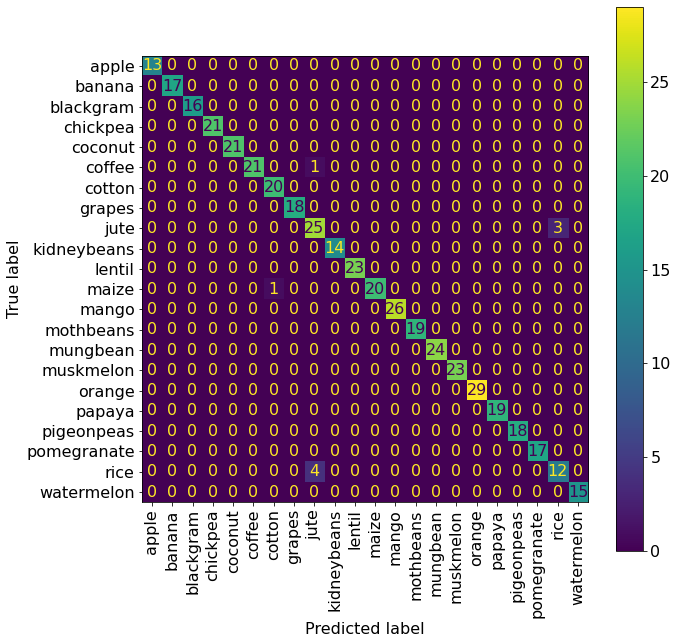

In [29]:
cm = confusion_matrix(Ytest, predicted_values) 
cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
cmp.plot(ax=ax, xticks_rotation='vertical')

In [30]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [31]:
print("Metric Evaluation for SVM ")

precision.append(round(precision_score(Ytest, predicted_values, average="macro"),4))
recall.append(round(recall_score(Ytest, predicted_values, average="macro"),4))
f1score.append(round(f1_score(Ytest, predicted_values, average="macro"),4))

print("Avg Precision: "+ str(round(precision_score(Ytest, predicted_values, average="macro"),4))) 
print("Avg Recall: " + str(round(recall_score(Ytest, predicted_values, average="macro"),4)))
print("Avg F1 score: " + str(round(f1_score(Ytest, predicted_values, average="macro"),4)))

Metric Evaluation for SVM 
Avg Precision: 0.9812
Avg Recall: 0.9795
Avg F1 score: 0.9802


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

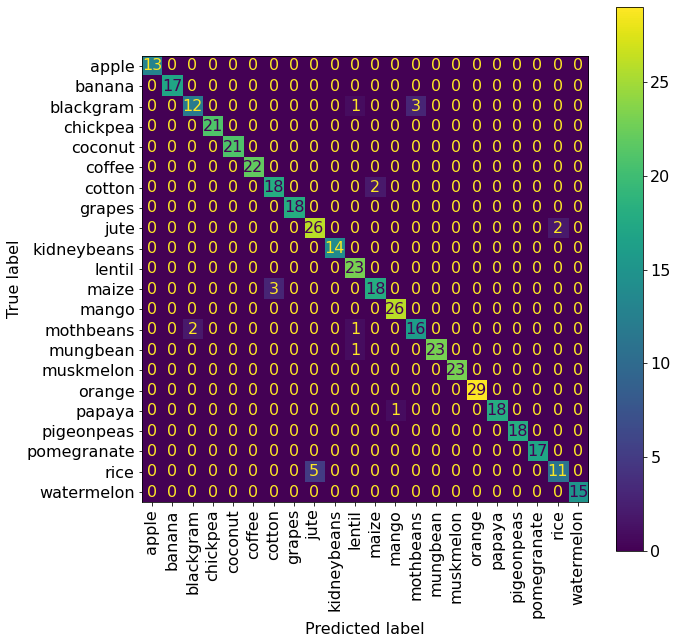

In [33]:
cm = confusion_matrix(Ytest, predicted_values) 
cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
cmp.plot(ax=ax, xticks_rotation='vertical')

In [34]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

In [35]:
print("Metric Evaluation for Logistic Regression ")

precision.append(round(precision_score(Ytest, predicted_values, average="macro"),4))
recall.append(round(recall_score(Ytest, predicted_values, average="macro"),4))
f1score.append(round(f1_score(Ytest, predicted_values, average="macro"),4))

print("Avg Precision: "+ str(round(precision_score(Ytest, predicted_values, average="macro"),4))) 
print("Avg Recall: " + str(round(recall_score(Ytest, predicted_values, average="macro"),4)))
print("Avg F1 score: " + str(round(f1_score(Ytest, predicted_values, average="macro"),4)))

Metric Evaluation for Logistic Regression 
Avg Precision: 0.954
Avg Recall: 0.9487
Avg F1 score: 0.9504


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

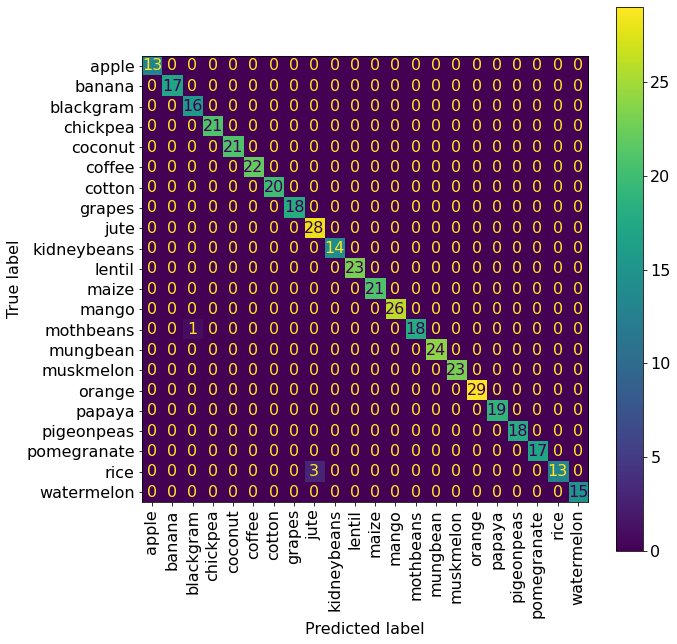

In [37]:
cm = confusion_matrix(Ytest, predicted_values) 
cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
cmp.plot(ax=ax, xticks_rotation='vertical')

In [38]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [39]:
print("Metric Evaluation for Random Forest ")

precision.append(round(precision_score(Ytest, predicted_values, average="macro"),4))
recall.append(round(recall_score(Ytest, predicted_values, average="macro"),4))
f1score.append(round(f1_score(Ytest, predicted_values, average="macro"),4))
print("Avg Precision: "+ str(round(precision_score(Ytest, predicted_values, average="macro"),4))) 
print("Avg Recall: " + str(round(recall_score(Ytest, predicted_values, average="macro"),4)))
print("Avg F1 score: " + str(round(f1_score(Ytest, predicted_values, average="macro"),4)))

Metric Evaluation for Random Forest 
Avg Precision: 0.9929
Avg Recall: 0.9891
Avg F1 score: 0.9904


# XGBoost

In [40]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

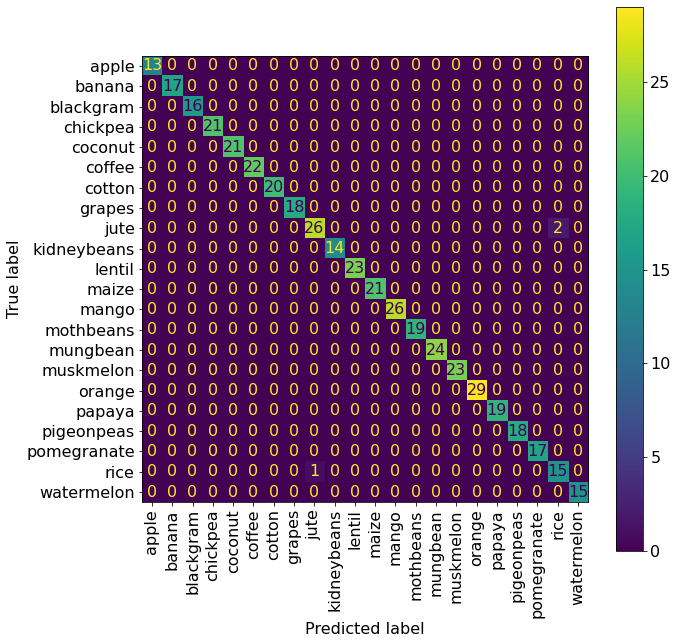

In [41]:
cm = confusion_matrix(Ytest, predicted_values) 
cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
cmp.plot(ax=ax, xticks_rotation='vertical')

In [42]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.98636364, 0.99318182, 0.99545455, 0.99090909, 0.98409091])

In [43]:
print("Metric Evaluation for XGBoost ")

precision.append(round(precision_score(Ytest, predicted_values, average="macro"),4))
recall.append(round(recall_score(Ytest, predicted_values, average="macro"),4))
f1score.append(round(f1_score(Ytest, predicted_values, average="macro"),4))

print("Avg Precision: "+ str(round(precision_score(Ytest, predicted_values, average="macro"),4))) 
print("Avg Recall: " + str(round(recall_score(Ytest, predicted_values, average="macro"),4)))
print("Avg F1 score: " + str(round(f1_score(Ytest, predicted_values, average="macro"),4)))

Metric Evaluation for XGBoost 
Avg Precision: 0.993
Avg Recall: 0.9939
Avg F1 score: 0.9934


# Results & Visualisation

## Accuracy Comparison

In [44]:
def show_values(axs, orient="v", space=.00000001):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

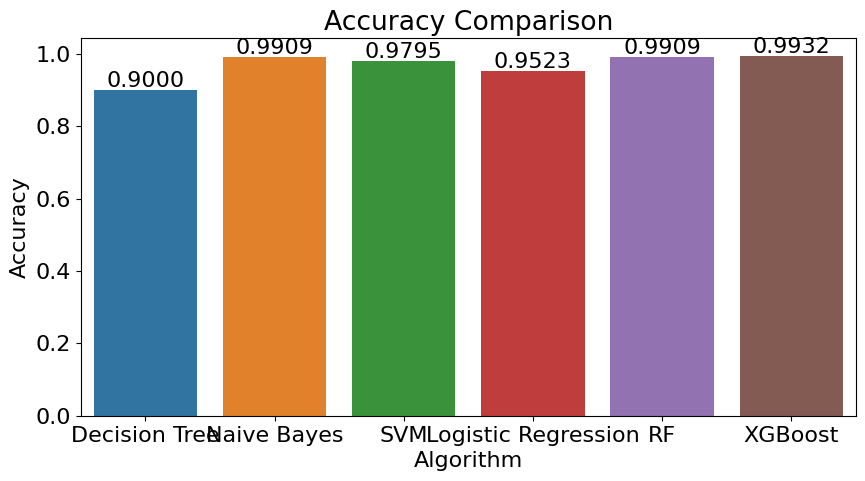

In [45]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
p = sns.barplot(x = model,y = acc, ci=None)
show_values(p)

In [46]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.9931818181818182


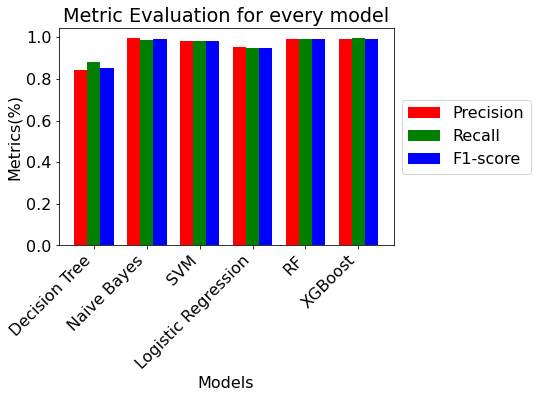

<Figure size 1440x1440 with 0 Axes>

In [47]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 6
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, precision, width, color = 'r')
bar2 = plt.bar(ind+width, recall, width, color='g')
bar3 = plt.bar(ind+width*2, f1score, width, color = 'b')
  
plt.xlabel("Models")
plt.ylabel('Metrics(%)')
plt.title("Metric Evaluation for every model")
  
plt.xticks(ind+width,model, rotation=45,horizontalalignment='right')
plt.legend( (bar1, bar2, bar3), ('Precision', 'Recall', 'F1-score'), loc='center left', bbox_to_anchor=(1, 0.5) )
plt.figure(figsize=(20,20))
plt.show()

## Making a prediction

In [48]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [49]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
